# Spring 2020 CS4641 Project


### Environment Setup

In [1]:
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pickle
%matplotlib inline

In [2]:
from sklearn import decomposition
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import tree

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

In [4]:
df = pd.read_pickle('dataframe_with_vector_compressed.pkl', compression='zip')

In [5]:
df.head(10)

,track_id,artist_name,duration,loudness,tempo,title,year,lyrics,tags,lyrics_vector
0,TRMMMKI128F931D80D,Lena Philipsson,262.26893,-3.925,122.332,006,1998,"1:23,2:5,3:13,4:10,5:4,6:9,7:1,8:4,9:4,10:1,11...","[[swedish, 100], [pop, 100]]","[0, 23, 5, 13, 10, 4, 9, 1, 4, 4, 1, 2, 2, 2, ..."
1,TRMMMUT128F42646E8,Shawn Colvin,216.47628,-14.379,99.214,(Looking For) The Heart Of Saturday,1994,"2:36,3:25,4:2,5:8,6:2,7:1,8:6,10:8,12:5,13:19,...","[[cover, 100]]","[0, 0, 36, 25, 2, 8, 2, 1, 6, 0, 8, 0, 5, 19, ..."
2,TRMMMQY128F92F0EA3,Dying Fetus,196.02240,-6.366,189.346,Ethos of Coercion,2009,"2:10,3:1,4:2,5:1,9:1,10:1,13:9,14:2,18:1,21:1,...","[[Technical Death Metal, 100], [Brutal Death M...","[0, 0, 10, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 9, 2,..."
3,TRMMMTK128F424EF7C,Emery,217.57342,-4.867,88.423,Rock-N-Rule,2007,"1:20,2:8,3:15,4:4,5:5,6:6,7:2,8:9,9:12,10:2,11...","[[post-hardcore, 100], [emo, 75], [rock, 50], ...","[0, 20, 8, 15, 4, 5, 6, 2, 9, 12, 2, 2, 7, 1, ..."
4,TRMMMQV12903CA201E,Rev. Timothy Wright,353.77587,-7.569,167.850,I Made It Over,0,"1:24,2:1,3:15,4:4,5:4,7:4,8:12,11:2,35:4,40:2,...","[[THE WRIGHT WAY, 100]]","[0, 24, 1, 15, 4, 4, 0, 4, 12, 0, 0, 2, 0, 0, ..."
5,TRMMMNO128F93539AA,Martin Sexton,319.81669,-7.185,187.378,In The Journey,2001,"1:30,2:15,3:4,4:6,5:15,6:5,7:3,8:13,9:11,10:6,...","[[singer-songwriter, 100], [rock, 66], [jazz, ...","[0, 30, 15, 4, 6, 15, 5, 3, 13, 11, 6, 5, 2, 2..."
6,TRMMMPJ128F9306985,Christian Castro,258.89914,-4.660,157.862,Tu Vida Con La Mía,0,"6:1,7:2,38:11,42:5,47:3,77:15,90:6,102:5,104:4...","[[cristian castro, 100], [azul, 100], [Roma, 5...","[0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, ..."
7,TRMMMRZ128F4265EB4,Aerosmith,253.70077,-3.278,67.060,I'm Ready,2004,"1:23,2:1,3:13,4:2,5:2,6:5,7:4,8:2,9:2,12:1,13:...","[[classic rock, 100], [rock, 83], [hard rock, ...","[0, 23, 1, 13, 2, 2, 5, 4, 2, 2, 0, 0, 1, 1, 0..."
8,TRMMMKQ128F92EBCB5,Kreator,372.42730,-6.663,191.665,All of the same blood,2001,"2:12,3:2,4:3,5:4,10:2,12:1,13:9,15:2,17:1,21:2...","[[thrash metal, 100], [metal, 32], [thrash, 23...","[0, 0, 12, 2, 3, 4, 0, 0, 0, 0, 2, 0, 1, 9, 0,..."
9,TRMMMBU128F9305AC3,The Maytals,175.20281,-9.049,156.753,Night And Day,1994,"1:6,2:4,3:4,4:2,5:7,10:1,11:5,13:1,21:2,27:1,2...","[[reggae, 100], [rocksteady, 75], [EARLY REGGA...","[0, 6, 4, 4, 2, 7, 0, 0, 0, 0, 1, 5, 0, 1, 0, ..."


# Loudness

In [6]:
df['loudness'].describe()


count    237662.000000
mean         -8.634050
std           4.141223
min         -47.691000
25%         -10.898000
50%          -7.696000
75%          -5.575000
max           3.147000
Name: loudness, dtype: float64

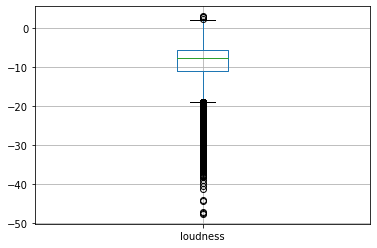

In [7]:
boxplot = df.boxplot(column=['loudness'])

In [6]:
df_loudness = df
df_loudness = df_loudness.drop('artist_name', axis = 1)
df_loudness = df_loudness.drop('duration', axis = 1)
df_loudness = df_loudness.drop('tempo', axis = 1)
df_loudness = df_loudness.drop('title', axis = 1)
df_loudness = df_loudness.drop('year', axis = 1)
df_loudness = df_loudness.drop('lyrics', axis = 1)
df_loudness = df_loudness.drop('tags', axis = 1)
df_loudness.head(10)

,track_id,loudness,lyrics_vector
0,TRMMMKI128F931D80D,-3.925,"[0, 23, 5, 13, 10, 4, 9, 1, 4, 4, 1, 2, 2, 2, ..."
1,TRMMMUT128F42646E8,-14.379,"[0, 0, 36, 25, 2, 8, 2, 1, 6, 0, 8, 0, 5, 19, ..."
2,TRMMMQY128F92F0EA3,-6.366,"[0, 0, 10, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 9, 2,..."
3,TRMMMTK128F424EF7C,-4.867,"[0, 20, 8, 15, 4, 5, 6, 2, 9, 12, 2, 2, 7, 1, ..."
4,TRMMMQV12903CA201E,-7.569,"[0, 24, 1, 15, 4, 4, 0, 4, 12, 0, 0, 2, 0, 0, ..."
5,TRMMMNO128F93539AA,-7.185,"[0, 30, 15, 4, 6, 15, 5, 3, 13, 11, 6, 5, 2, 2..."
6,TRMMMPJ128F9306985,-4.660,"[0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, ..."
7,TRMMMRZ128F4265EB4,-3.278,"[0, 23, 1, 13, 2, 2, 5, 4, 2, 2, 0, 0, 1, 1, 0..."
8,TRMMMKQ128F92EBCB5,-6.663,"[0, 0, 12, 2, 3, 4, 0, 0, 0, 0, 2, 0, 1, 9, 0,..."
9,TRMMMBU128F9305AC3,-9.049,"[0, 6, 4, 4, 2, 7, 0, 0, 0, 0, 1, 5, 0, 1, 0, ..."


### We need to remove rows without loudness info, there turns out all of them have loudness info

In [7]:
print(df_loudness['loudness'].describe())
print(df_loudness[df_loudness['loudness'] == 0].count())
df_loudness = df_loudness.replace(0, np.nan)
df_loudness = df_loudness.dropna(how='any', axis=0)
print(df_loudness['loudness'].describe())

count    237662.000000
mean         -8.634050
std           4.141223
min         -47.691000
25%         -10.898000
50%          -7.696000
75%          -5.575000
max           3.147000
Name: loudness, dtype: float64
track_id         0
loudness         0
lyrics_vector    0
dtype: int64
count    237662.000000
mean         -8.634050
std           4.141223
min         -47.691000
25%         -10.898000
50%          -7.696000
75%          -5.575000
max           3.147000
Name: loudness, dtype: float64


### We use 75%, 50%, 25% to classify our data.
#### 0: 0\~25%; 1: 25\~50%; 2: 50\~75%; 3: 75\~100%

In [8]:
def f(row):
    if row['loudness'] >= -5.575000:
        val = 3
    elif row['loudness'] >= -7.696000:
        val = 2
    elif row['loudness'] >= -10.898000:
        val = 1
    else:
        val = 0
    return val
df_loudness['loudness_type'] = df_loudness.apply(f, axis=1)
df_loudness.head(10)

,track_id,loudness,lyrics_vector,loudness_type
0,TRMMMKI128F931D80D,-3.925,"[0, 23, 5, 13, 10, 4, 9, 1, 4, 4, 1, 2, 2, 2, ...",3
1,TRMMMUT128F42646E8,-14.379,"[0, 0, 36, 25, 2, 8, 2, 1, 6, 0, 8, 0, 5, 19, ...",0
2,TRMMMQY128F92F0EA3,-6.366,"[0, 0, 10, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 9, 2,...",2
3,TRMMMTK128F424EF7C,-4.867,"[0, 20, 8, 15, 4, 5, 6, 2, 9, 12, 2, 2, 7, 1, ...",3
4,TRMMMQV12903CA201E,-7.569,"[0, 24, 1, 15, 4, 4, 0, 4, 12, 0, 0, 2, 0, 0, ...",2
5,TRMMMNO128F93539AA,-7.185,"[0, 30, 15, 4, 6, 15, 5, 3, 13, 11, 6, 5, 2, 2...",2
6,TRMMMPJ128F9306985,-4.660,"[0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, ...",3
7,TRMMMRZ128F4265EB4,-3.278,"[0, 23, 1, 13, 2, 2, 5, 4, 2, 2, 0, 0, 1, 1, 0...",3
8,TRMMMKQ128F92EBCB5,-6.663,"[0, 0, 12, 2, 3, 4, 0, 0, 0, 0, 2, 0, 1, 9, 0,...",2
9,TRMMMBU128F9305AC3,-9.049,"[0, 6, 4, 4, 2, 7, 0, 0, 0, 0, 1, 5, 0, 1, 0, ...",1


In [9]:
# Get data to plot
X_loudness = np.array(df_loudness["lyrics_vector"].values.tolist())[:,1:]
print(X_loudness)
print(X_loudness.shape)

y_loudness = np.array(df_loudness["loudness_type"])
print(y_loudness[:20])
print(y_loudness.shape)

[[23  5 13 ...  0  0  0]
 [ 0 36 25 ...  0  0  0]
 [ 0 10  1 ...  0  0  0]
 ...
 [ 0  1  0 ...  0  0  0]
 [ 8  6  6 ...  0  0  0]
 [ 0 15  1 ...  0  0  0]]
(237662, 5000)
[3 0 2 3 2 2 3 3 2 1 1 3 0 0 1 3 2 3 2 1]
(237662,)


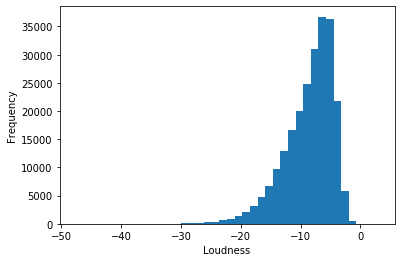

In [13]:
y_loudness_ori = np.array(df_loudness["loudness"])
plt.xlabel('Loudness')
plt.ylabel('Frequency')
plt.hist(y_loudness_ori, bins=40)
plt.show()

## PCA

In [22]:
# Apply PCA
print("Starting PCA Decomposition ...")
pca = decomposition.TruncatedSVD(n_components=600)
print("Fitting Data ...")
pca.fit(X_loudness)
print("Transforming X ...")
X_loudness_transform = pca.transform(X_loudness)
print(X_loudness_transform.shape)
variance = pca.explained_variance_ratio_
print("Variance retained by top 20 components")
print(variance[:20])
print("Variance Retained: " + str(np.sum(variance)))

Starting PCA Decomposition ...
Fitting Data ...
Transforming X ...
(237662, 600)
Variance retained by top 20 components
[0.1840761  0.0616306  0.04532879 0.02502119 0.02172465 0.0182933
 0.01549365 0.01477086 0.01313112 0.01195562 0.01044135 0.01004401
 0.0096278  0.00911801 0.00825723 0.0081365  0.0076984  0.00752297
 0.0072434  0.00692066]
Variance Retained: 0.8984850322024853


Text(0, 0.5, 'Retained Variance')

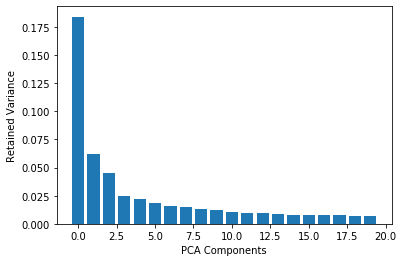

In [15]:
a = [0.1840761, 0.0616306, 0.04532879, 0.02502119, 0.02172465, 0.0182933,
 0.01549365, 0.01477086, 0.01313112, 0.01195562, 0.01044135, 0.01004401,
 0.0096278,  0.00911801, 0.00825723, 0.0081365,  0.0076984,  0.00752297,
 0.0072434, 0.00692066]

plt.bar(range(20),a)
plt.xlabel("PCA Components")
plt.ylabel("Retained Variance")

In [17]:
print(sum(a))

0.4964362100000001


In [23]:
pd.DataFrame(X_loudness_transform).to_pickle("pca_loudness.pkl")

In [20]:
df_pca = pd.read_pickle('pca_loudness.pkl')
X_pca = df_pca.to_numpy()

In [12]:
print(X_pca)

[[ 3.07003874e+01  9.22572316e+00  6.59715844e+00 ... -6.31225449e-01
  -6.18479225e-01  6.31809377e-02]
 [ 3.80039726e+01 -2.12329863e+01 -2.29781861e+01 ...  1.38715436e-01
  -6.97354535e-01  3.10087229e-01]
 [ 7.33690619e+00 -8.39194868e+00 -1.69372859e+00 ... -7.22993229e-02
  -9.90140528e-02  2.17653462e-02]
 ...
 [ 2.49285438e+00 -1.51289711e+00 -3.55336387e-01 ...  3.43173721e-01
   6.45812350e-02 -4.65134603e-01]
 [ 1.55466522e+01  1.87964603e-01  9.99111480e-02 ...  2.59579837e-02
   5.42255405e-02  3.04877485e-01]
 [ 2.16497833e+01 -1.60346455e+01 -1.89842487e+00 ...  5.44132645e-01
   6.49669890e-01 -1.50201968e-01]]


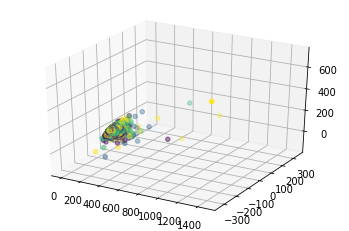

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_loudness_transform[:,0], X_loudness_transform[:,1], X_loudness_transform[:,2], c = y_loudness, marker = 'o')
plt.show()

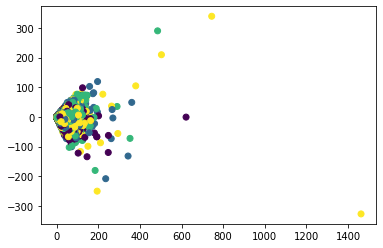

In [27]:
fig, ax = plt.subplots()
ax.scatter(X_loudness_transform[:,0], X_loudness_transform[:,1], c = y_loudness, marker = 'o')
plt.show()

## Plot for Random Forest on PCA Data

In [ ]:
h = .02
fig, (ax1, ax2) = plt.subplots(1, 2)
X, y = X_pca[:,:2],y_loudness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax1.set_title("Input data")
# Plot the training points
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
            edgecolors='k')
# Plot the testing points
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
            edgecolors='k')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())

clf_100 = RandomForestClassifier(max_depth=3, random_state=0)
clf_100.fit(X_train, y_train)
score = clf_100.score(X_test, y_test)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf_100.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax2.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
            edgecolors='k')
# Plot the testing points
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
            edgecolors='k', alpha=0.6)

ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title("Random Tree")
ax2.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
plt.show()

In [21]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_loudness, test_size=0.3, random_state=0)
print(X_pca.shape)

(237662, 600)


In [22]:
clf_pca = RandomForestClassifier(max_depth=10, random_state=0)
clf_pca.fit(X_train_pca, y_train_pca)
print(clf_pca.feature_importances_)
top_ten = imp.argsort()[-10:][::-1]
print(top_ten)
train_score = clf_pca.score(X_train_pca, y_train_pca)
test_score = clf_pca.score(X_test_pca, y_test_pca)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

[0.02004664 0.0029161  0.00146601 0.00660643 0.00514141 0.00636664
 0.00191221 0.00536843 0.00843509 0.00458624 0.00332364 0.00254368
 0.01334782 0.02287326 0.0100985  0.00823219 0.01525403 0.00919423
 0.00679612 0.0019712  0.00124914 0.00580298 0.00435351 0.00174591
 0.00154495 0.00159818 0.00121458 0.00304178 0.00735723 0.00199768
 0.0013665  0.00146913 0.00275889 0.00115068 0.00479022 0.00293018
 0.0018854  0.0012798  0.0017999  0.0016965  0.00198518 0.00337264
 0.00256978 0.00131364 0.00156703 0.0014714  0.0017657  0.00195455
 0.00127812 0.00247981 0.00250895 0.00331681 0.00143346 0.00127752
 0.00132963 0.00122456 0.00114277 0.0013792  0.00141984 0.00126417
 0.00245005 0.00478089 0.00115645 0.00217145 0.00143849 0.00125352
 0.00109305 0.00125055 0.00287789 0.00149162 0.00133829 0.0024443
 0.0015986  0.00225051 0.00154174 0.0013821  0.00126197 0.00130201
 0.00185123 0.00255986 0.00156999 0.00131217 0.00142873 0.00125358
 0.00182577 0.00254252 0.00127844 0.00122987 0.00093458 0.00713

### Conclusion: Top ten most important features are not pca features that captures most variance 

## Get Words

In [16]:
import json
with open("word_list.json", 'r') as w:
    word_list = list(json.load(w))

## All words included

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_loudness, y_loudness, test_size=0.3, random_state=0)

## Logistic regression

In [ ]:
clf = LogisticRegression(random_state=0, max_iter = 2000).fit(X_train, y_train)

In [ ]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

In [12]:
def accuracy(y_predict, y_test):
    accuracy = 0
    n = y_predict.shape[0]
    for i in range(n):
        if y_predict[i] == y_test[i]:
            accuracy += 1
    accuracy /= n
    return accuracy

In [50]:
print(accuracy(y_predict, y_test))

0.3508313734069901


## Linear regression

### Using original tempo

In [26]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

In [28]:
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

Train score: 0.17341482522850038
Test score: 0.11137352103129873


## Lassso Regression

In [15]:
lasso = linear_model.Lasso(alpha=0.0001, max_iter = 3000).fit(X_train, y_train)

In [16]:
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

Train score: 0.17114739339372298
Test score: 0.12075797189333261


## Support vector machines (SVMs) 

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

## Gaussian Naive Bayes

In [32]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
train_score = gnb.score(X_train, y_train)
test_score = gnb.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

Train score: 0.3431953018399524
Test score: 0.3139735480161012


## Random Forest

In [33]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)

[0.03482689 0.01057861 0.00424074 ... 0.         0.         0.        ]


In [34]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

Train score: 0.3241345731923565
Test score: 0.3182513078724807


In [35]:
imp = clf.feature_importances_
top_ten = imp.argsort()[-10:][::-1]
print(top_ten)
for i in top_ten:
    print(word_list[i+1])

[  0 454 464 260 191  23  11  66  32  74]
i
shit
scream
fuck
these
no
is
take
what
life


In [11]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))
imp = clf.feature_importances_
top_ten = imp.argsort()[-10:][::-1]
print(top_ten)
for i in top_ten:
    print(word_list[i+1])

[0.02742007 0.01176994 0.0066483  ... 0.         0.         0.        ]
Train score: 0.34323136755167916
Test score: 0.3332164546487328
[  0   7  29 260 454   8  32 334  18 333]
i
it
this
fuck
shit
not
what
hate
we
death


In [19]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))
imp = clf.feature_importances_
top_ten = imp.argsort()[-10:][::-1]
print(top_ten)
for i in top_ten:
    print(word_list[i+1])

[1.37816829e-02 7.87442999e-03 6.10629062e-03 ... 0.00000000e+00
 7.55545222e-05 0.00000000e+00]
Train score: 0.3990009797851686
Test score: 0.34543261476318043
[ 29 260  18  26   0   7 454 334 333  32]
this
fuck
we
love
i
it
shit
hate
death
what


# Exclude first twenty common words

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_loudness[:,20:], y_loudness, test_size=0.3, random_state=0)

## Gaussian Naive Bayes

In [15]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
train_score = gnb.score(X_train, y_train)
test_score = gnb.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

Train score: 0.34302098423327304
Test score: 0.3141138024376218


## Random Forest

In [15]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))
imp = clf.feature_importances_
top_twenty = imp.argsort()[-20:][::-1]
print(top_twenty)
for i in top_twenty:
    print(word_list[i+21])

[0.00596575 0.01238951 0.00407465 ... 0.         0.         0.        ]
Train score: 0.34812428244261046
Test score: 0.3380692576333469
[  6   9 284 240 260 262 563   3 109 184 347  54   1  55 434 121 313  49
  39  24]


NameError: name 'word_list' is not defined

In [17]:
for i in top_twenty:
    print(word_list[i+21])

love
this
blood
fuck
kill
breath
bleed
no
wanna
burn
hell
life
all
yeah
shit
noth
death
ca
he
up


In [19]:
top_twenty = imp.argsort()[-20:][::-1]
print(top_twenty)
for i in top_twenty:
    print(word_list[i+21])

[  6   9 284 240 260 262 563   3 109 184 347  54   1  55 434 121 313  49
  39  24]
love
this
blood
fuck
kill
breath
bleed
no
wanna
burn
hell
life
all
yeah
shit
noth
death
ca
he
up


## Use Randon Forest to reduce dymansion first to refuce dimension to 500 and then use Neural Network

In [12]:
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))
imp = clf.feature_importances_
top_500 = imp.argsort()[-500:][::-1]
top_20 = top_500[:20]
print(top_20)
for i in top_20:
    print(word_list[i+21])

[3.50944496e-03 5.47227108e-03 3.13461386e-03 ... 2.39803552e-05
 7.02927466e-05 0.00000000e+00]
Train score: 0.4887625253211351
Test score: 0.3557132638606432
[240   6   9 284  55 109 434  24 260 314  31   1   3  39  40 347 563 262
  12  54]
fuck
love
this
blood
yeah
wanna
shit
up
kill
hate
get
all
no
he
feel
hell
bleed
breath
what
life


In [13]:
top_500 = top_500 + 20
X_500 = X_loudness[:,top_500]

In [17]:
X_train_500, X_test_500, y_train_500, y_test_500 = train_test_split(X_500, y_loudness, test_size=0.3, random_state=0)

In [18]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter = 1000)
clf.fit(X_train_500, y_train_500)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [19]:
train_score = clf.score(X_train_500, y_train_500)
test_score = clf.score(X_test_500, y_test_500)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

Train score: 0.36838720148109855
Test score: 0.35502601719519206


## Find the best depth for Random Forest with plot

In [12]:
min_depth = 3
max_depth = 61

depths = range(min_depth, max_depth, 3)

test_accuracies = np.zeros(len(depths))
train_accuracies = np.zeros(len(depths))

clf_models = list()

In [14]:
for i in range(len(depths)):
    print("Running with Max Depth: %d" % depths[i])

    clf = RandomForestClassifier(max_depth=depths[i], random_state=0)
    clf.fit(X_train, y_train)
    
    test_accuracies[i] = clf.score(X_test, y_test)
    train_accuracies[i] = clf.score(X_train, y_train)
    
    clf_models.append(clf)   

print("Done!")

Running with Max Depth: 3
Running with Max Depth: 6
Running with Max Depth: 9
Running with Max Depth: 12
Running with Max Depth: 15
Running with Max Depth: 18
Running with Max Depth: 21
Running with Max Depth: 24
Running with Max Depth: 27
Running with Max Depth: 30
Running with Max Depth: 33
Running with Max Depth: 36
Running with Max Depth: 39
Running with Max Depth: 42
Running with Max Depth: 45
Running with Max Depth: 48
Running with Max Depth: 51
Running with Max Depth: 54
Running with Max Depth: 57
Running with Max Depth: 60
Done!


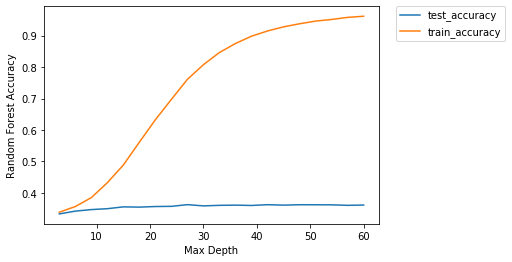

In [15]:
# print(test_accuracies)
fig, ax = plt.subplots()
ax.plot(depths, test_accuracies, label="test_accuracy")
ax.plot(depths, train_accuracies, label="train_accuracy")
ax.set_ylabel('Random Forest Accuracy')
ax.set_xlabel('Max Depth')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

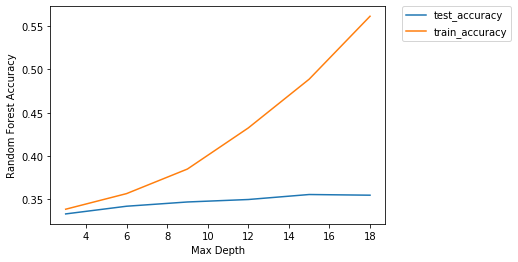

In [18]:
# print(test_accuracies)
fig, ax = plt.subplots()
ax.plot(depths[:6], test_accuracies[:6], label="test_accuracy")
ax.plot(depths[:6], train_accuracies[:6], label="train_accuracy")
ax.set_ylabel('Random Forest Accuracy')
ax.set_xlabel('Max Depth')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Only include 21 - 2000 words

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_loudness[:,20:2000], y_loudness, test_size=0.3, random_state=0)

In [12]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))
imp = clf.feature_importances_
top_twenty = imp.argsort()[-20:][::-1]
print(top_twenty)
for i in top_twenty:
    print(word_list[i+21])
    print(imp[i])

[0.00511171 0.01054915 0.00244973 ... 0.         0.         0.        ]
Train score: 0.3482084357699729
Test score: 0.33825158838132374
[  9 284 240   6 434 314  55  54 109 224 313 262 141  12 347 184 446  49
 214 255]
this
0.04668481944570859
blood
0.039984687809334125
fuck
0.039469102918727385
love
0.0392460528189483
shit
0.03519459890264929
hate
0.02651181556364638
yeah
0.023074500372797662
life
0.019781010754313277
wanna
0.019078784621935053
blue
0.018505043394164325
death
0.018080800577647514
breath
0.017827306381320022
lie
0.014807244754308762
what
0.01471835131231562
hell
0.014291116727939781
burn
0.014267296246888956
control
0.011705891476945375
ca
0.011536927981807004
pain
0.011388739239904055
fight
0.011298669911400015


In [15]:
print("this "*47)
print("blood "*40)
print("fuck "*39)
print("love "*39)
print("shit "*35)
print("hate "*27)
print("yeah "*23)
print("life "*20)
print("wanna "*19)
print("blue "*19)
print("death "*18)
print("breath "*18)
print("lie "*15)
print("what "*15)
print("hell "*14)
print("burn "*14)
print("control "*12)
print("ca "*12)
print("pain "*11)
print("fight "*11)

this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this this 
blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood blood 
fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck 
love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love 
shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit s

<BarContainer object of 20 artists>

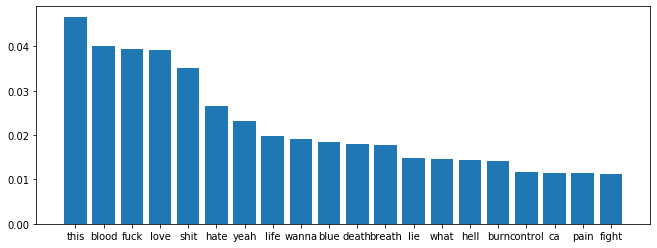

In [40]:
strs = list()
heights = list()
for i in top_twenty:
    strs.append(word_list[i+21])
    heights.append(imp[i])
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)
ax.bar(strs, heights, width=0.8, bottom=None, align='center', data=None)

## Reduce dimension

In [56]:
top_100 = imp.argsort()[-100:][::-1]
top_100 = top_100 + 20
X_100 = X_loudness[:,top_100]

In [57]:
print(X_100.shape)
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_100, y_loudness, test_size=0.3, random_state=0)

(237662, 100)


In [59]:
clf_100 = RandomForestClassifier(max_depth=10, random_state=0)
clf_100.fit(X_train_100, y_train_100)
train_score = clf_100.score(X_train_100, y_train_100)
test_score = clf_100.score(X_test_100, y_test_100)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))
imp_100 = clf_100.feature_importances_
top_twenty = imp_100.argsort()[-20:][::-1]
print(top_twenty)
for i in top_twenty:
    print(word_list[top_100[i]+1])

Train score: 0.38942553332171215
Test score: 0.3418000252457959
[ 0  2  3  6  8 20  4 31  1 47 21 13  5  9 27 10 29  7 48 61]
this
fuck
love
yeah
wanna
get
shit
he
blood
feel
all
what
hate
blue
no
death
up
life
will
like


## Plot Random Forest Classfication Result using only love and fuck

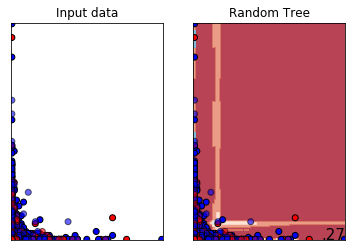

In [84]:
h = .02
fig, (ax1, ax2) = plt.subplots(1, 2)
X, y = X_100[:,1:3],y_loudness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax1.set_title("Input data")
# Plot the training points
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
            edgecolors='k')
# Plot the testing points
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
            edgecolors='k')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())

clf_100 = RandomForestClassifier(max_depth=10, random_state=0)
clf_100.fit(X_train, y_train)
score = clf_100.score(X_test, y_test)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf_100.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax2.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
            edgecolors='k')
# Plot the testing points
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
            edgecolors='k', alpha=0.6)

ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title("Random Tree")
ax2.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
plt.show()

## Plot for Decision Tree using only love and fuck

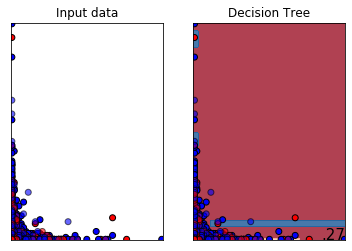

In [83]:
h = .02
fig, (ax1, ax2) = plt.subplots(1, 2)
X, y = X_100[:,1:3],y_loudness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax1.set_title("Input data")
# Plot the training points
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
            edgecolors='k')
# Plot the testing points
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
            edgecolors='k')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())


clf = tree.DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]


# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax2.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
            edgecolors='k')
# Plot the testing points
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
            edgecolors='k', alpha=0.6)

ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title("Decision Tree")
ax2.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
plt.show()

In [58]:
clf_100 = RandomForestClassifier(max_depth=20, random_state=0)
clf_100.fit(X_train_100, y_train_100)
train_score = clf_100.score(X_train_100, y_train_100)
test_score = clf_100.score(X_test_100, y_test_100)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))
imp_100 = clf_100.feature_importances_
top_twenty = imp_100.argsort()[-20:][::-1]
print(top_twenty)
for i in top_twenty:
    print(word_list[top_100[i]+1])

Train score: 0.6522063199148849
Test score: 0.3484621102680262
[ 3  0 21 27 48 79 33 13 61 29 20 95  2 41 22 31 98 69 47 89]
love
this
all
no
will
for
so
what
like
up
get
just
fuck
now
out
he
was
time
feel
got


In [43]:
top_500 = imp.argsort()[-500:][::-1]
top_500 = top_500 + 20
X_500 = X_loudness[:,top_500]

In [49]:
print(X_500.shape)
X_train_500, X_test_500, y_train_500, y_test_500 = train_test_split(X_500, y_loudness, test_size=0.3, random_state=0)

(237662, 500)


In [53]:
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train_500, y_train_500)
train_score = clf.score(X_train_500, y_train_500)
test_score = clf.score(X_test_500, y_test_500)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))
imp = clf.feature_importances_
top_twenty = imp.argsort()[-20:][::-1]
print(top_twenty)
for i in top_twenty:
    print(word_list[top_500[i]+1])

Train score: 0.6741523055006221
Test score: 0.3552083479431689
[  3   0   2  21  27  20  13   6  48  33  29  31   8  79 334  47 189  22
 158  61]
love
this
fuck
all
no
get
what
yeah
will
so
up
he
wanna
for
be
feel
but
out
have
like


## SVM

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

## Neural Network

In [14]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [15]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

Train score: 0.40207257623389814
Test score: 0.36018737990715155


## Decision Tree

In [17]:
clf = tree.DecisionTreeClassifier(max_depth=20)
clf = clf.fit(X_train, y_train)

In [18]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

Train score: 0.45821486748856416
Test score: 0.3170451198474032


# Normalize each song to let them have the same sum of words (By row)

In [27]:
X_sum = np.sum(X_loudness, axis=1).reshape((X_loudness.shape[0],1))
X_loudness_n = X_loudness/X_sum
print(X_loudness_n)

[[0.09349593 0.0203252  0.05284553 ... 0.         0.         0.        ]
 [0.         0.1097561  0.07621951 ... 0.         0.         0.        ]
 [0.         0.12820513 0.01282051 ... 0.         0.         0.        ]
 ...
 [0.         0.01886792 0.         ... 0.         0.         0.        ]
 [0.04848485 0.03636364 0.03636364 ... 0.         0.         0.        ]
 [0.         0.04347826 0.00289855 ... 0.         0.         0.        ]]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_loudness_n[:,20:], y_loudness, test_size=0.4, random_state=0)

In [29]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))
imp = clf.feature_importances_
top_twenty = imp.argsort()[-20:][::-1]
print(top_twenty)
for i in top_twenty:
    print(word_list[i+21])

[0.00371463 0.0052025  0.00215893 ... 0.         0.         0.        ]
Train score: 0.35455865130402464
Test score: 0.3414611055593541
[  6   9 284 260 240  39 563 262 109 224  54 347  55 121 313 434  49 184
  33   3]
love
this
blood
kill
fuck
he
bleed
breath
wanna
blue
life
hell
yeah
noth
death
shit
ca
burn
was
no


<BarContainer object of 20 artists>

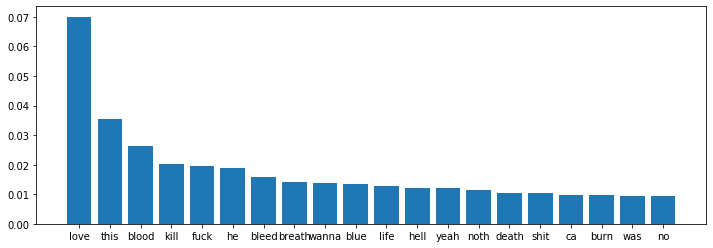

In [32]:
strs = list()
heights = list()
for i in top_twenty:
    strs.append(word_list[i+21])
    heights.append(imp[i])
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
ax.bar(strs, heights, width=0.8, bottom=None, align='center', data=None)

In [23]:
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))
imp = clf.feature_importances_
top_twenty = imp.argsort()[-20:][::-1]
print(top_twenty)
for i in top_twenty:
    print(word_list[i+21])

[3.85458088e-03 4.04343477e-03 3.16333198e-03 ... 1.05145367e-05
 3.20733713e-05 1.17306772e-05]
Train score: 0.6770268659228456
Test score: 0.3552201125545679
[  6   9 240  39 224  55 284   1 109  24   0   3  31  54  33 314  12 434
  40 313]
love
this
fuck
he
blue
yeah
blood
all
wanna
up
will
no
get
life
was
hate
what
shit
feel
death


<BarContainer object of 20 artists>

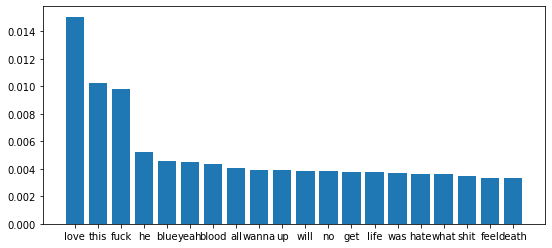

In [34]:
strs = list()
heights = list()
for i in top_twenty:
    strs.append(word_list[i+21])
    heights.append(imp[i])
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(111)
ax.bar(strs, heights, width=0.8, bottom=None, align='center', data=None)

### Normalized Decision Tree

In [15]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [16]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

Train score: 0.9894748231277387
Test score: 0.2911261027503892


# Normalize by column to let each word have same occurrance

In [18]:
X_sum_c = np.sum(X_loudness, axis=0).reshape((1, X_loudness.shape[1]))
X_loudness_n_c = X_loudness/X_sum_c
print(X_loudness_n_c)

[[1.10640328e-05 2.68271718e-06 7.45303014e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.93155637e-05 1.43327503e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.36543437e-06 5.73310011e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 5.36543437e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.84835925e-06 3.21926062e-06 3.43986007e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.04815155e-06 5.73310011e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_loudness_n_c[:,20:], y_loudness, test_size=0.4, random_state=0)

In [25]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))
imp = clf.feature_importances_
top_twenty = imp.argsort()[-20:][::-1]
print(top_twenty)
for i in top_twenty:
    print(word_list[i+21])

[0.0040129  0.01449196 0.00395303 ... 0.         0.         0.        ]
Train score: 0.35086292137983266
Test score: 0.34023036869510337
[  6   9 284 240 260 262 563 109  54   1  55 184   3 121 347 434 313  49
 171  39]
love
this
blood
fuck
kill
breath
bleed
wanna
life
all
yeah
burn
no
noth
hell
shit
death
ca
these
he


<BarContainer object of 20 artists>

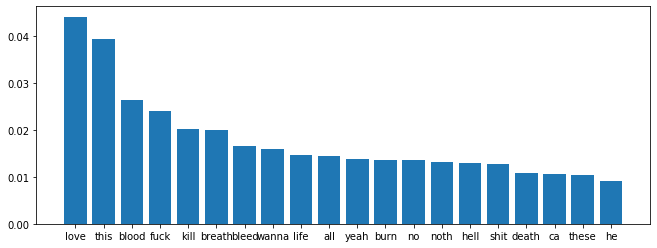

In [26]:
strs = list()
heights = list()
for i in top_twenty:
    strs.append(word_list[i+21])
    heights.append(imp[i])
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)
ax.bar(strs, heights, width=0.8, bottom=None, align='center', data=None)

In [78]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))
imp = clf.feature_importances_
top_twenty = imp.argsort()[-20:][::-1]
print(top_twenty)
for i in top_twenty:
    print(word_list[i+21])

[2.55668679e-03 9.41301801e-03 2.91599251e-03 ... 5.68801240e-05
 2.12631146e-05 5.09645185e-05]
Train score: 0.40673366199849925
Test score: 0.3468153368747699
[  9 240   6 434 284  55 314 224 109  12  31   1  54  39 262 313 446 137
  24 347]
this
fuck
love
shit
blood
yeah
hate
blue
wanna
what
get
all
life
he
breath
death
control
es
up
hell


In [79]:
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))
imp = clf.feature_importances_
top_twenty = imp.argsort()[-20:][::-1]
print(top_twenty)
for i in top_twenty:
    print(word_list[i+21])

[3.54982647e-03 7.50205553e-03 3.21977270e-03 ... 6.13572745e-05
 4.75602782e-05 9.70001739e-05]
Train score: 0.520361578434329
Test score: 0.3521169725976963
[  9   6 240  55 109 434 284   1  31 314  12 224  39  54  24   3 262 313
  40  29]
this
love
fuck
yeah
wanna
shit
blood
all
get
hate
what
blue
he
life
up
no
breath
death
feel
out


In [80]:
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))
imp = clf.feature_importances_
top_twenty = imp.argsort()[-20:][::-1]
print(top_twenty)
for i in top_twenty:
    print(word_list[i+21])

[0.00383517 0.00599342 0.00381243 ... 0.00016128 0.0001027  0.00017963]
Train score: 0.6554205207683191
Test score: 0.3558933361384316
[  9   6 240   1  55  12  31   3 109  24 284  39 224   7 434  54 314  29
  15   0]
this
love
fuck
all
yeah
what
get
no
wanna
up
blood
he
blue
so
shit
life
hate
out
like
will


# Normalization doesn't give a better result for trees